In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Load the dataset
file_path = 'job_data_merged_1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Category,Workplace,Location,Department,Type
0,0,Business Analyst,Remote,United Kingdom,Operations,Full time
1,1,Business Analyst,Remote,"Makati, Metro Manila, Philippines",Aux HQ,Full time
2,2,Business Analyst,On-site,"Al-Dajeej, Al Farwaniyah Governorate, Kuwait",PWC Technologies,Full time
3,3,Business Analyst,On-site,"London, England, United Kingdom","Consultants, Advisory",Full time
4,4,Business Analyst,Remote,United Kingdom,Operations,Full time


In [35]:
# Checking data types and missing values
data_info = data.info()

# Summary statistics for categorical data
summary_stats = data.describe(include='all')

# Checking for unique values in key columns
unique_values = {
    'Category': data['Category'].unique(),
    'Workplace': data['Workplace'].unique(),
    'Department': data['Department'].unique(),
    'Type': data['Type'].unique()
}

data_info, summary_stats, unique_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1095 non-null   int64 
 1   Category    1095 non-null   object
 2   Workplace   1039 non-null   object
 3   Location    1027 non-null   object
 4   Department  929 non-null    object
 5   Type        926 non-null    object
dtypes: int64(1), object(5)
memory usage: 51.5+ KB


(None,
          Unnamed: 0 Category Workplace                         Location  \
 count   1095.000000     1095      1039                             1027   
 unique          NaN        6         5                              265   
 top             NaN    UI/UX   On-site  London, England, United Kingdom   
 freq            NaN      191       461                               79   
 mean     547.000000      NaN       NaN                              NaN   
 std      316.243577      NaN       NaN                              NaN   
 min        0.000000      NaN       NaN                              NaN   
 25%      273.500000      NaN       NaN                              NaN   
 50%      547.000000      NaN       NaN                              NaN   
 75%      820.500000      NaN       NaN                              NaN   
 max     1094.000000      NaN       NaN                              NaN   
 
          Department       Type  
 count           929        926  
 unique    

In [36]:
# Step 1: Drop the 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Handling missing values - for simplicity, we will fill missing values with 'Unknown' for categorical data
data_cleaned.fillna('Unknown', inplace=True)

# Step 3: Standardize 'Workplace' values
data_cleaned['Workplace'] = data_cleaned['Workplace'].replace({'Hybride': 'Hybrid', 'Sur cite': 'On-site'})

# No specific instruction for Location simplification; skipping Step 4 for now.

# Step 5 & 6: As Department standardization and Type value standardization require specific domain knowledge or decisions,
# we will simply standardize 'Type' by translating 'Temps plein' to 'Full time', assuming no further categorization for 'Department'.
data_cleaned['Type'] = data_cleaned['Type'].replace({'Temps plein': 'Full time'})

# Quick check on the cleanup
data_cleaned.describe(include='all')


,Category,Workplace,Location,Department,Type
count,1095,1095,1095,1095,1095
unique,6,4,266,275,6
top,UI/UX,On-site,"London, England, United Kingdom",Unknown,Full time
freq,191,464,79,166,850


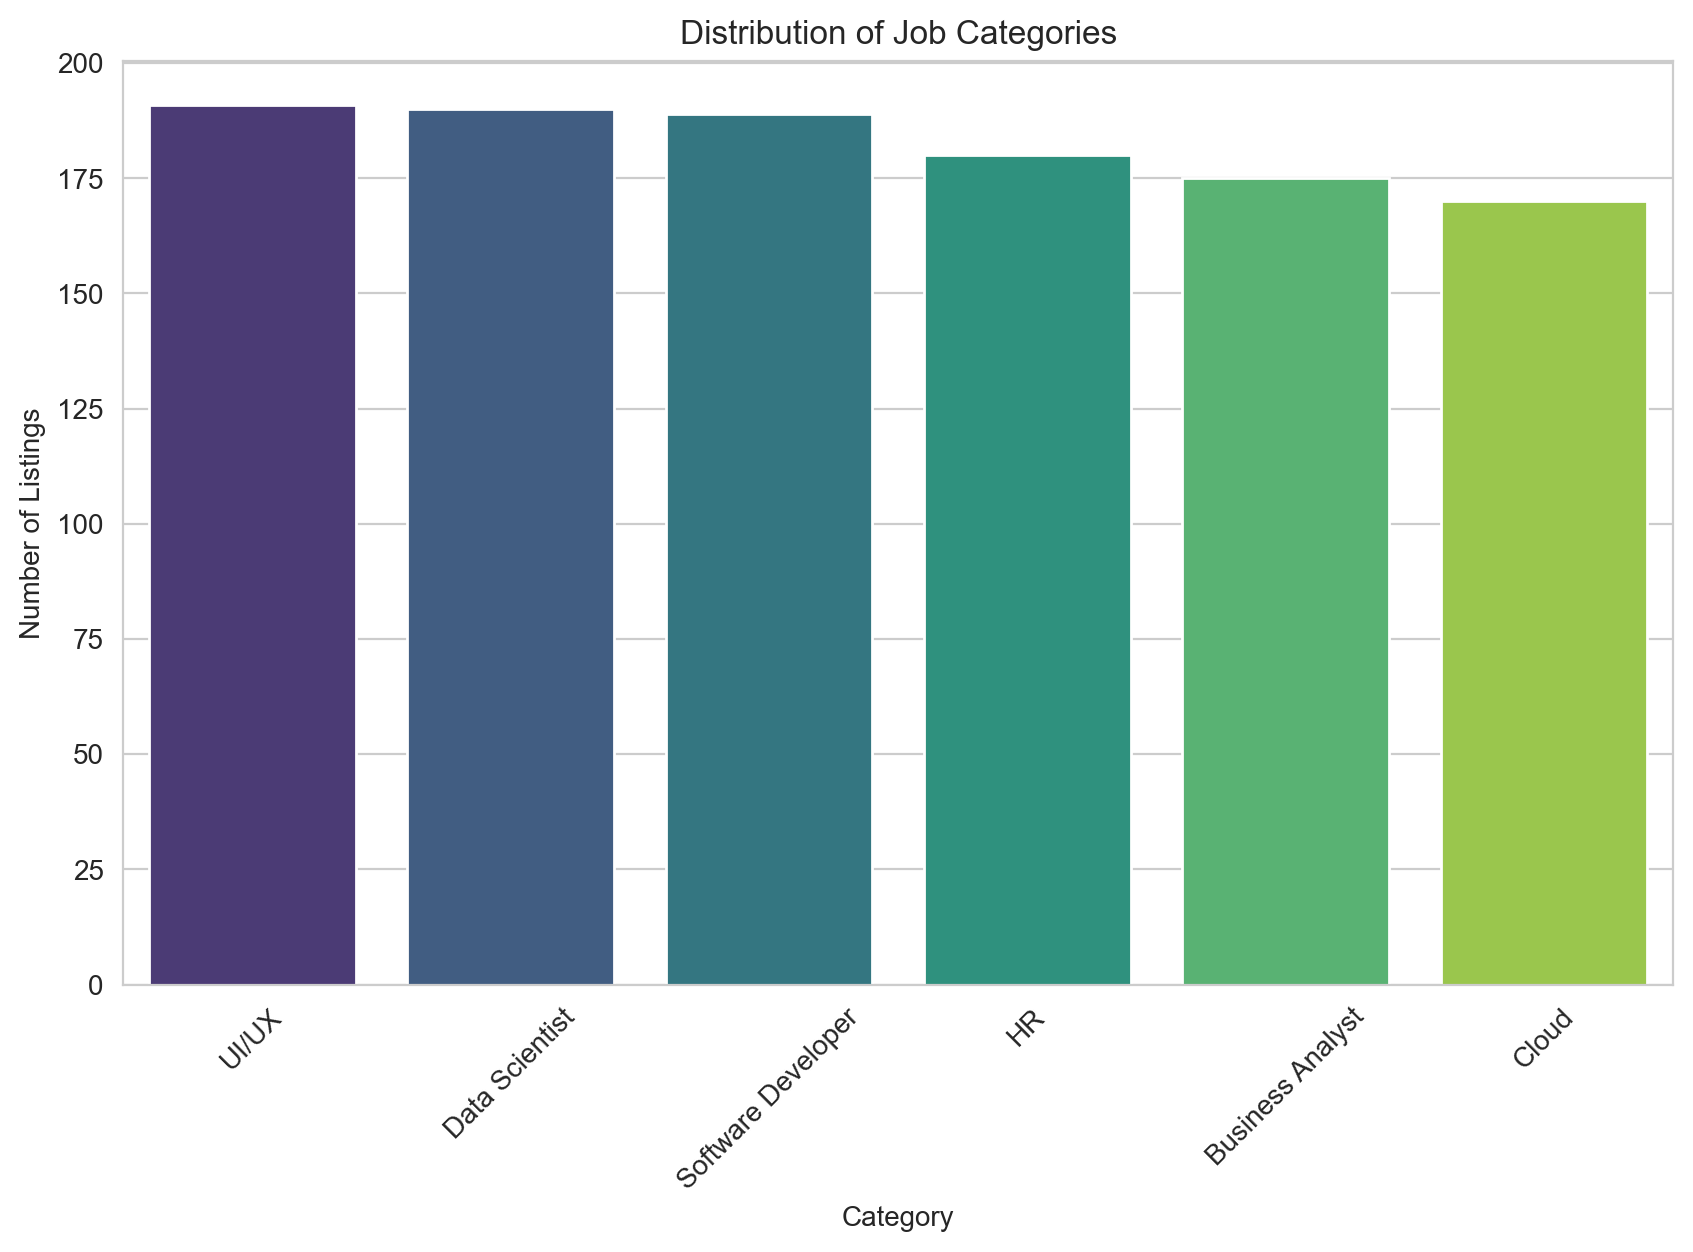

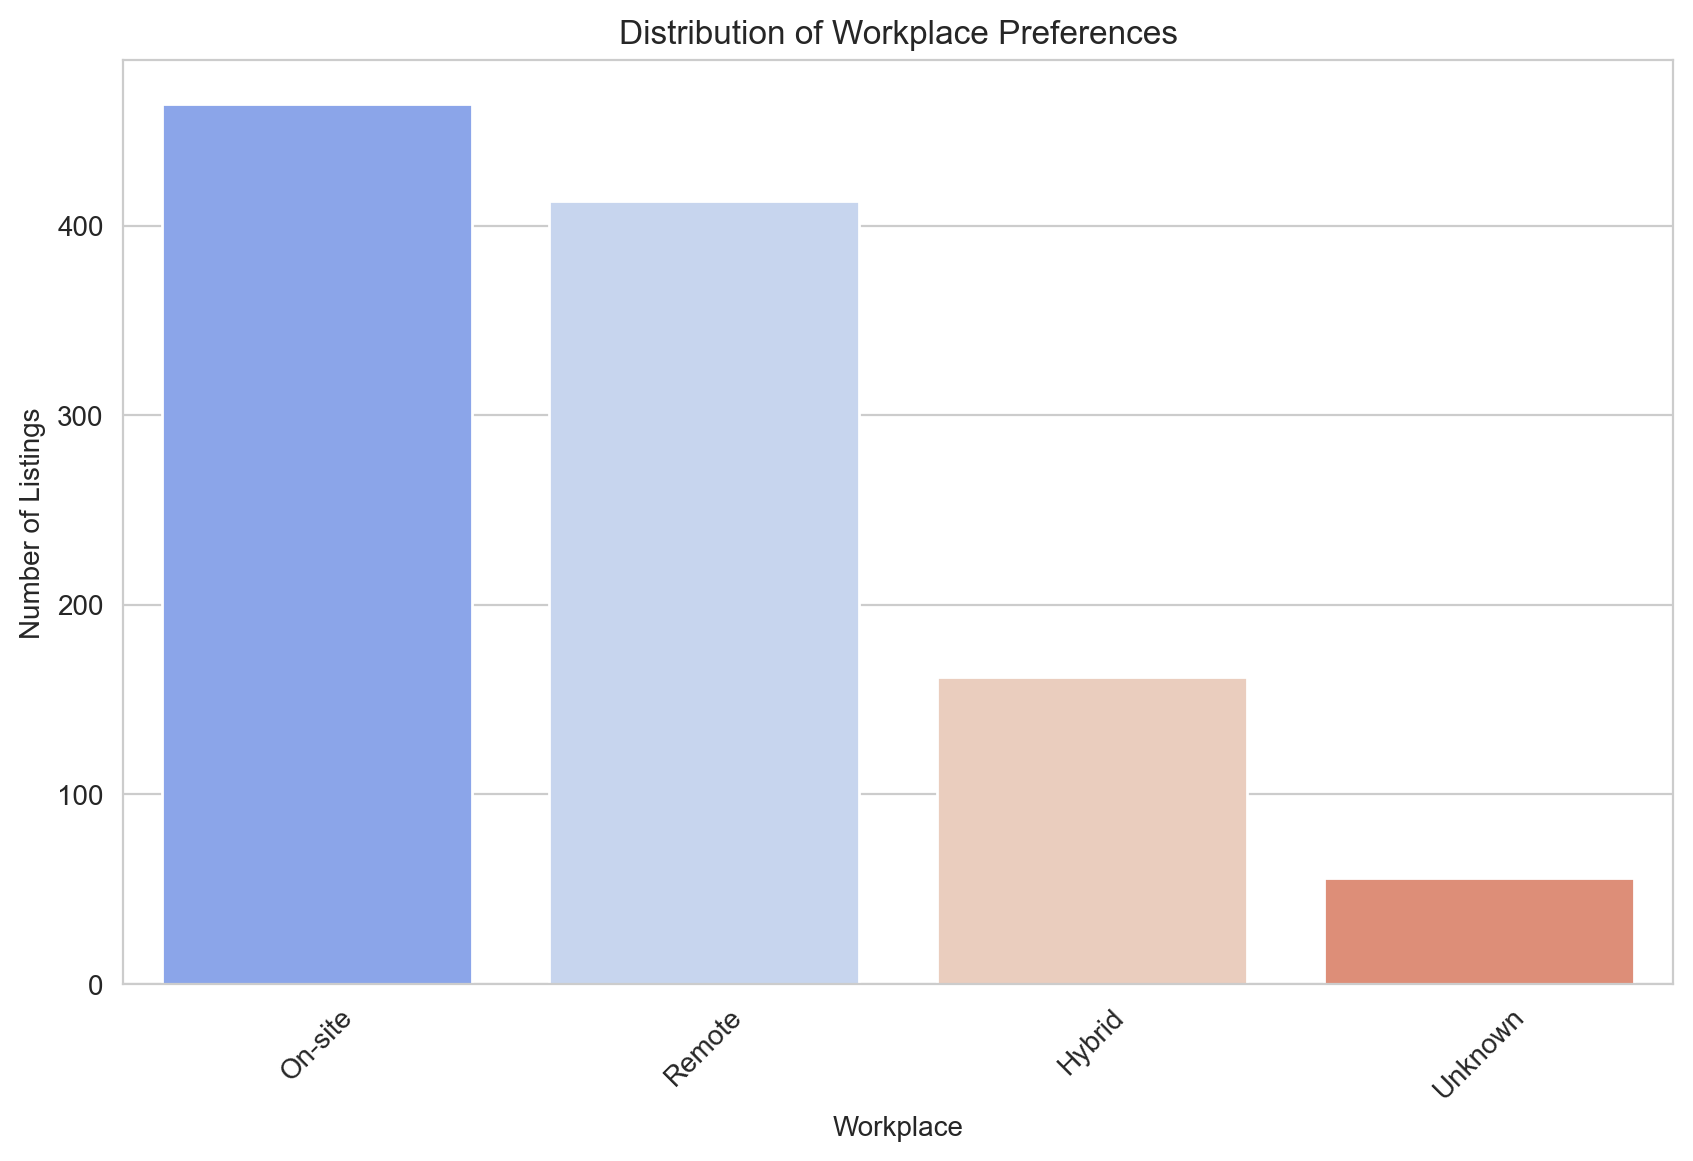

In [37]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of job categories
plt.figure(figsize=(10, 6), dpi=200)
category_counts = data_cleaned['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Job Categories')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of workplace preferences
plt.figure(figsize=(10, 6), dpi=200)
workplace_counts = data_cleaned['Workplace'].value_counts()
sns.barplot(x=workplace_counts.index, y=workplace_counts.values, palette='coolwarm')
plt.title('Distribution of Workplace Preferences')
plt.xlabel('Workplace')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


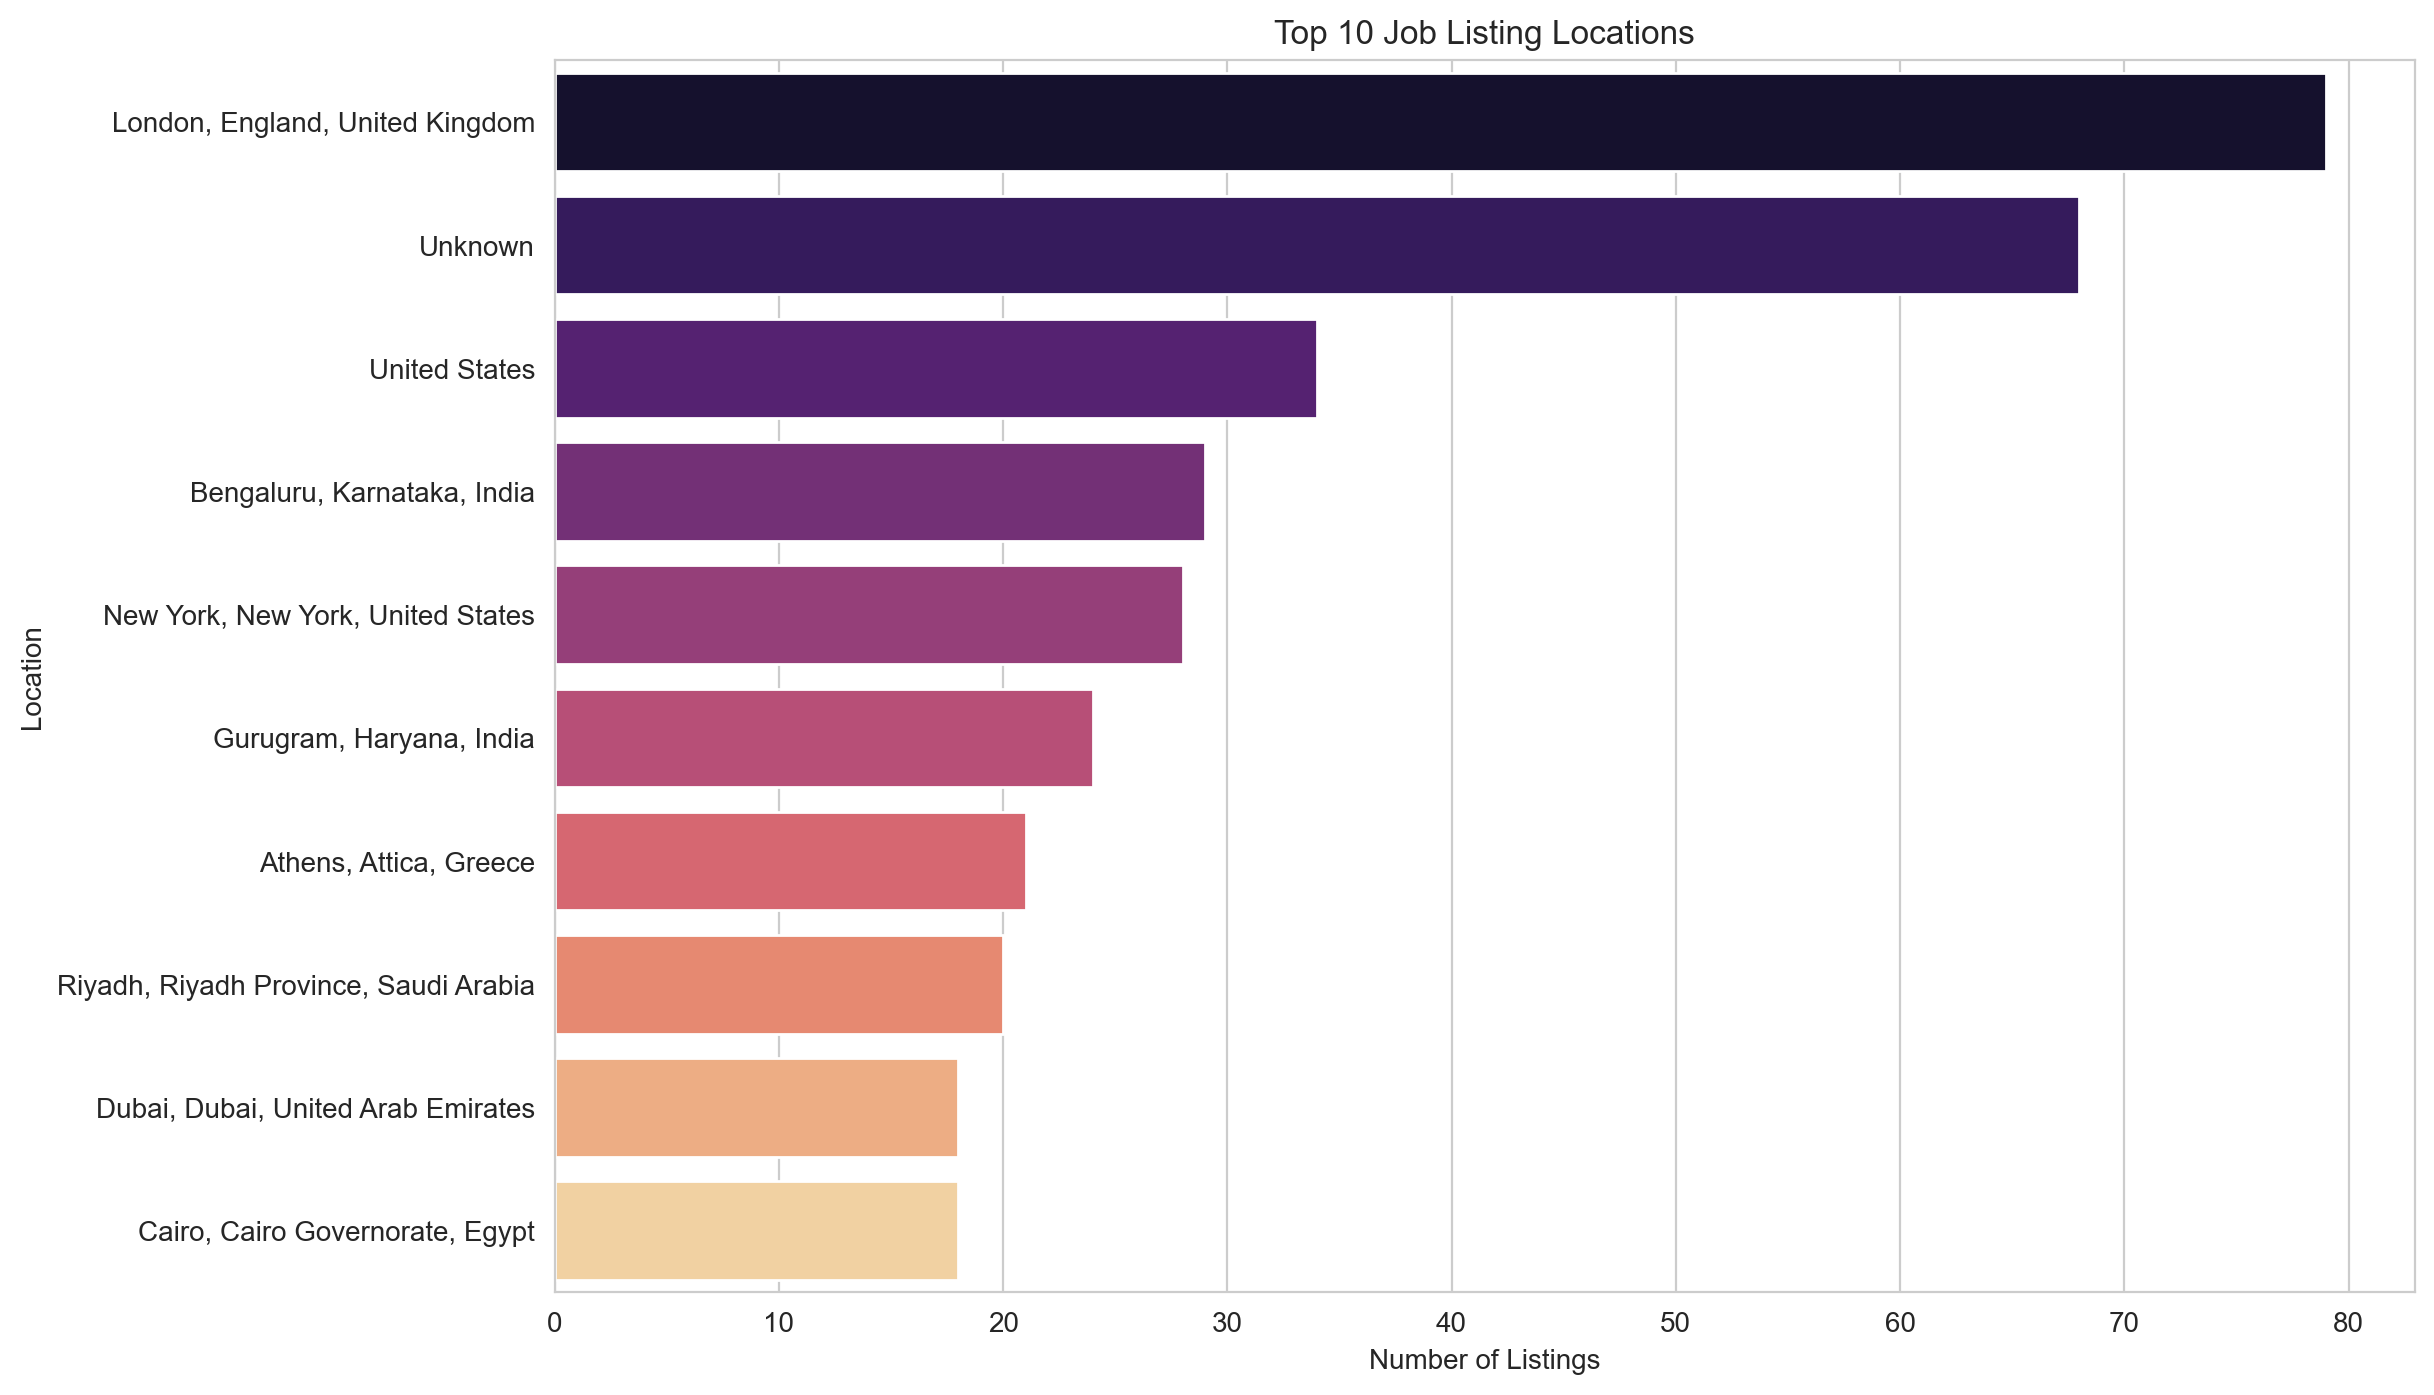

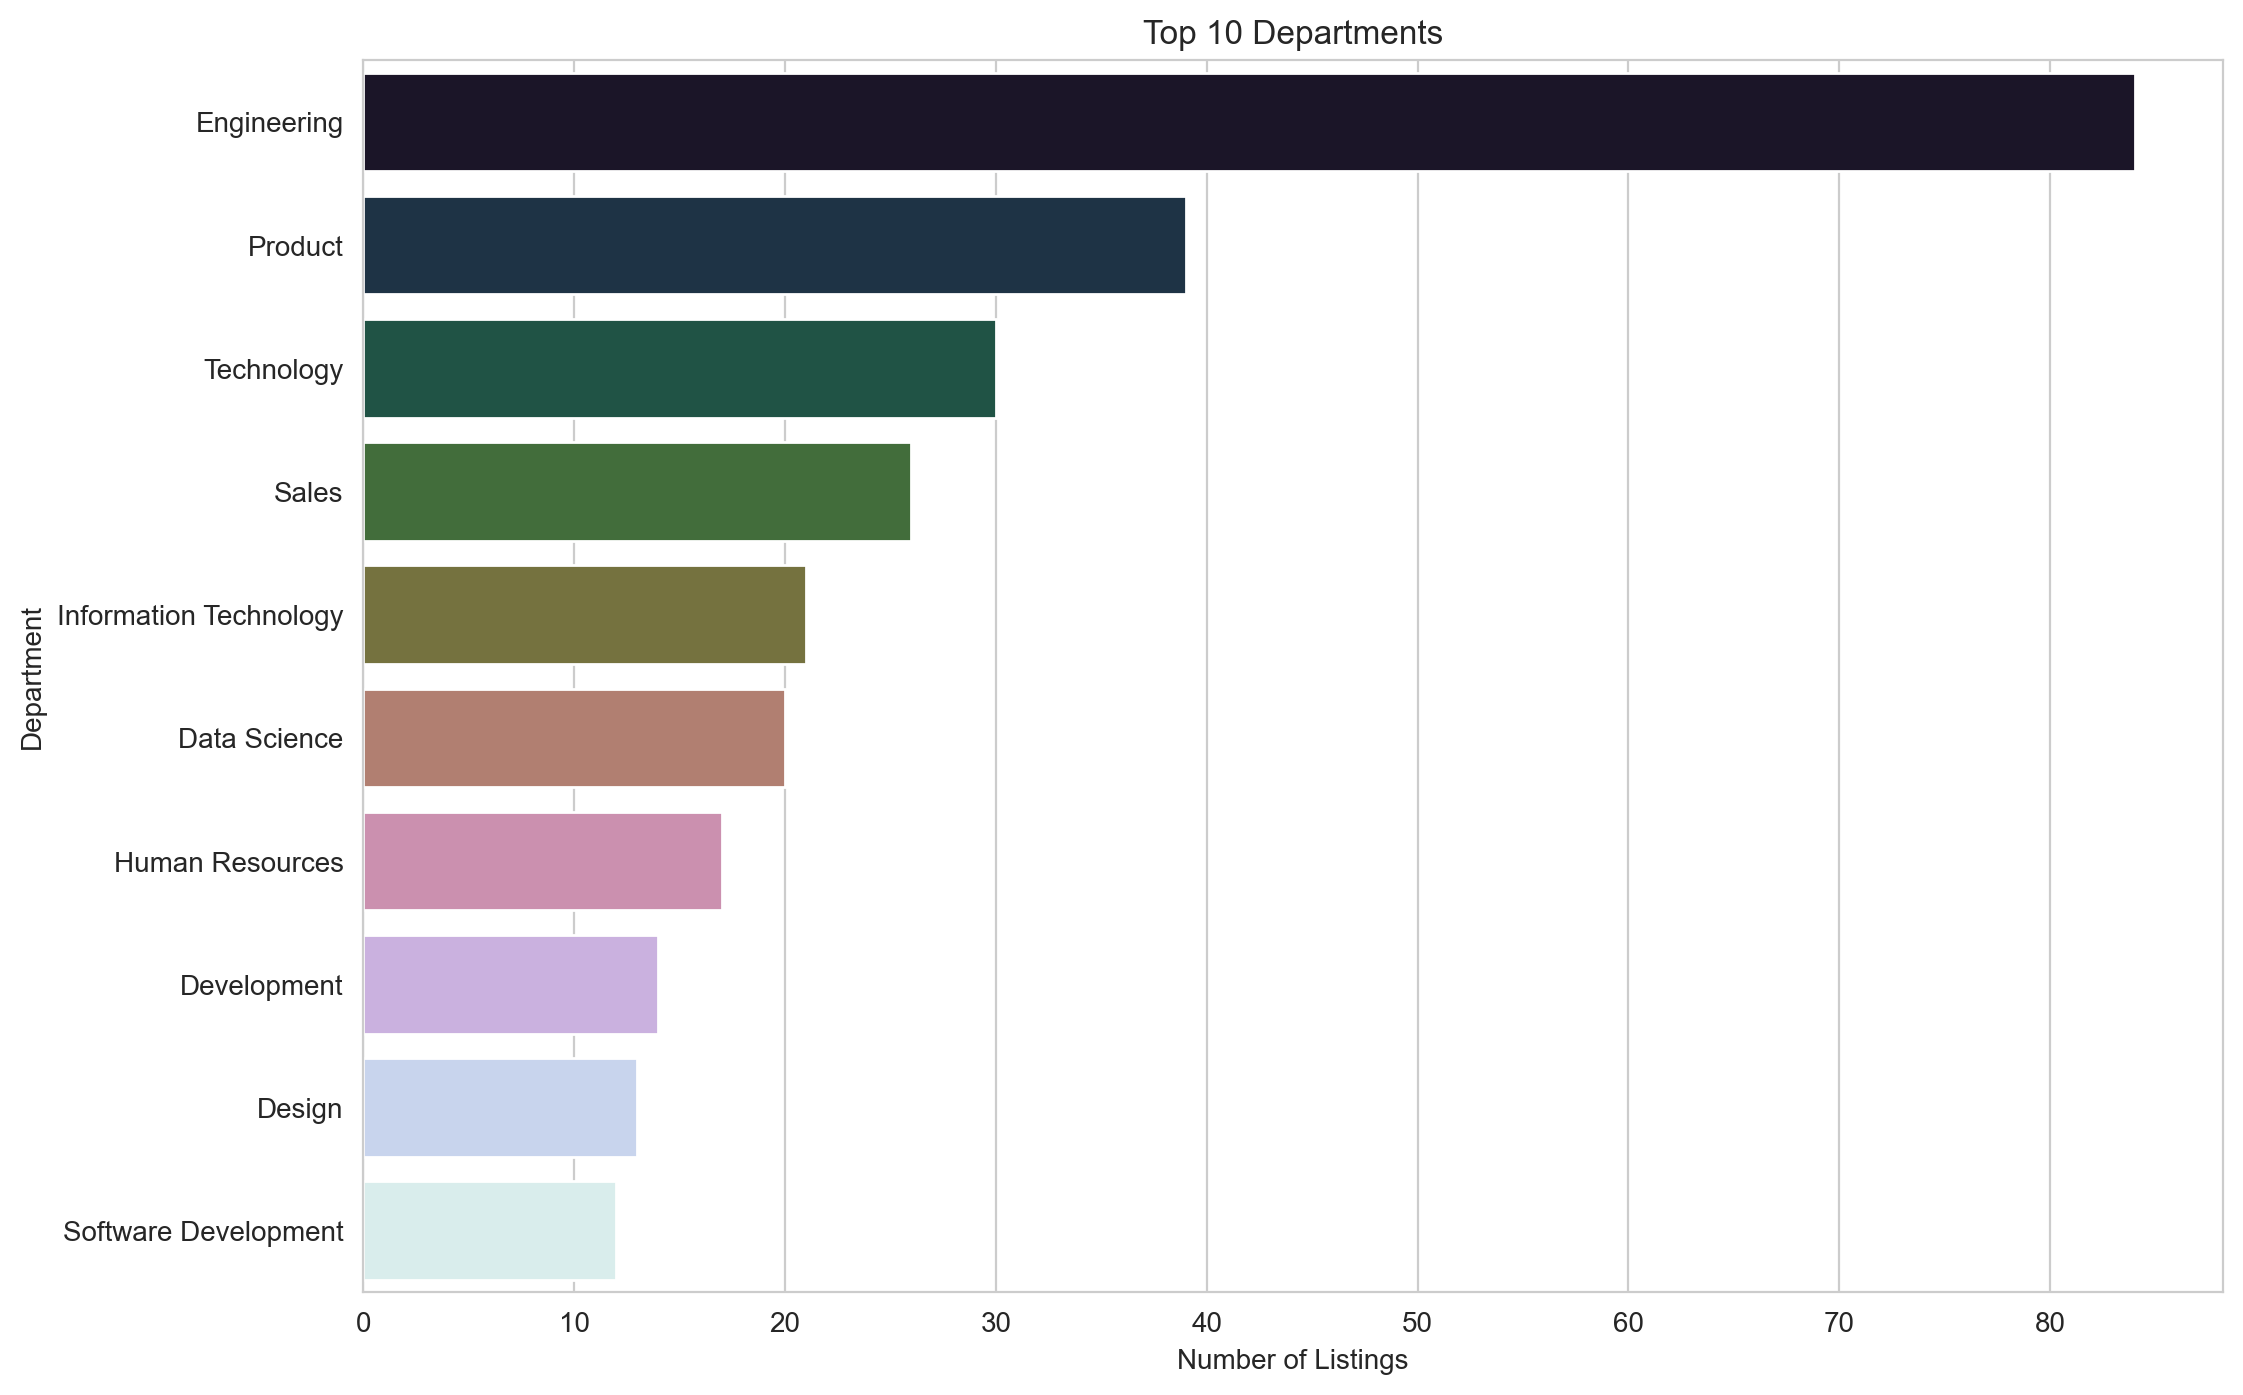

In [38]:
# Analyzing the top 10 locations for job listings
plt.figure(figsize=(12, 8),dpi=200)
location_counts = data_cleaned['Location'].value_counts().head(10)
sns.barplot(y=location_counts.index, x=location_counts.values, palette='magma')
plt.title('Top 10 Job Listing Locations')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.show()

# Analyzing the top 10 departments
plt.figure(figsize=(12, 8), dpi=200)
department_counts = data_cleaned[data_cleaned['Department'] != 'Unknown']['Department'].value_counts().head(10)
sns.barplot(y=department_counts.index, x=department_counts.values, palette='cubehelix')
plt.title('Top 10 Departments')
plt.xlabel('Number of Listings')
plt.ylabel('Department')
plt.show()


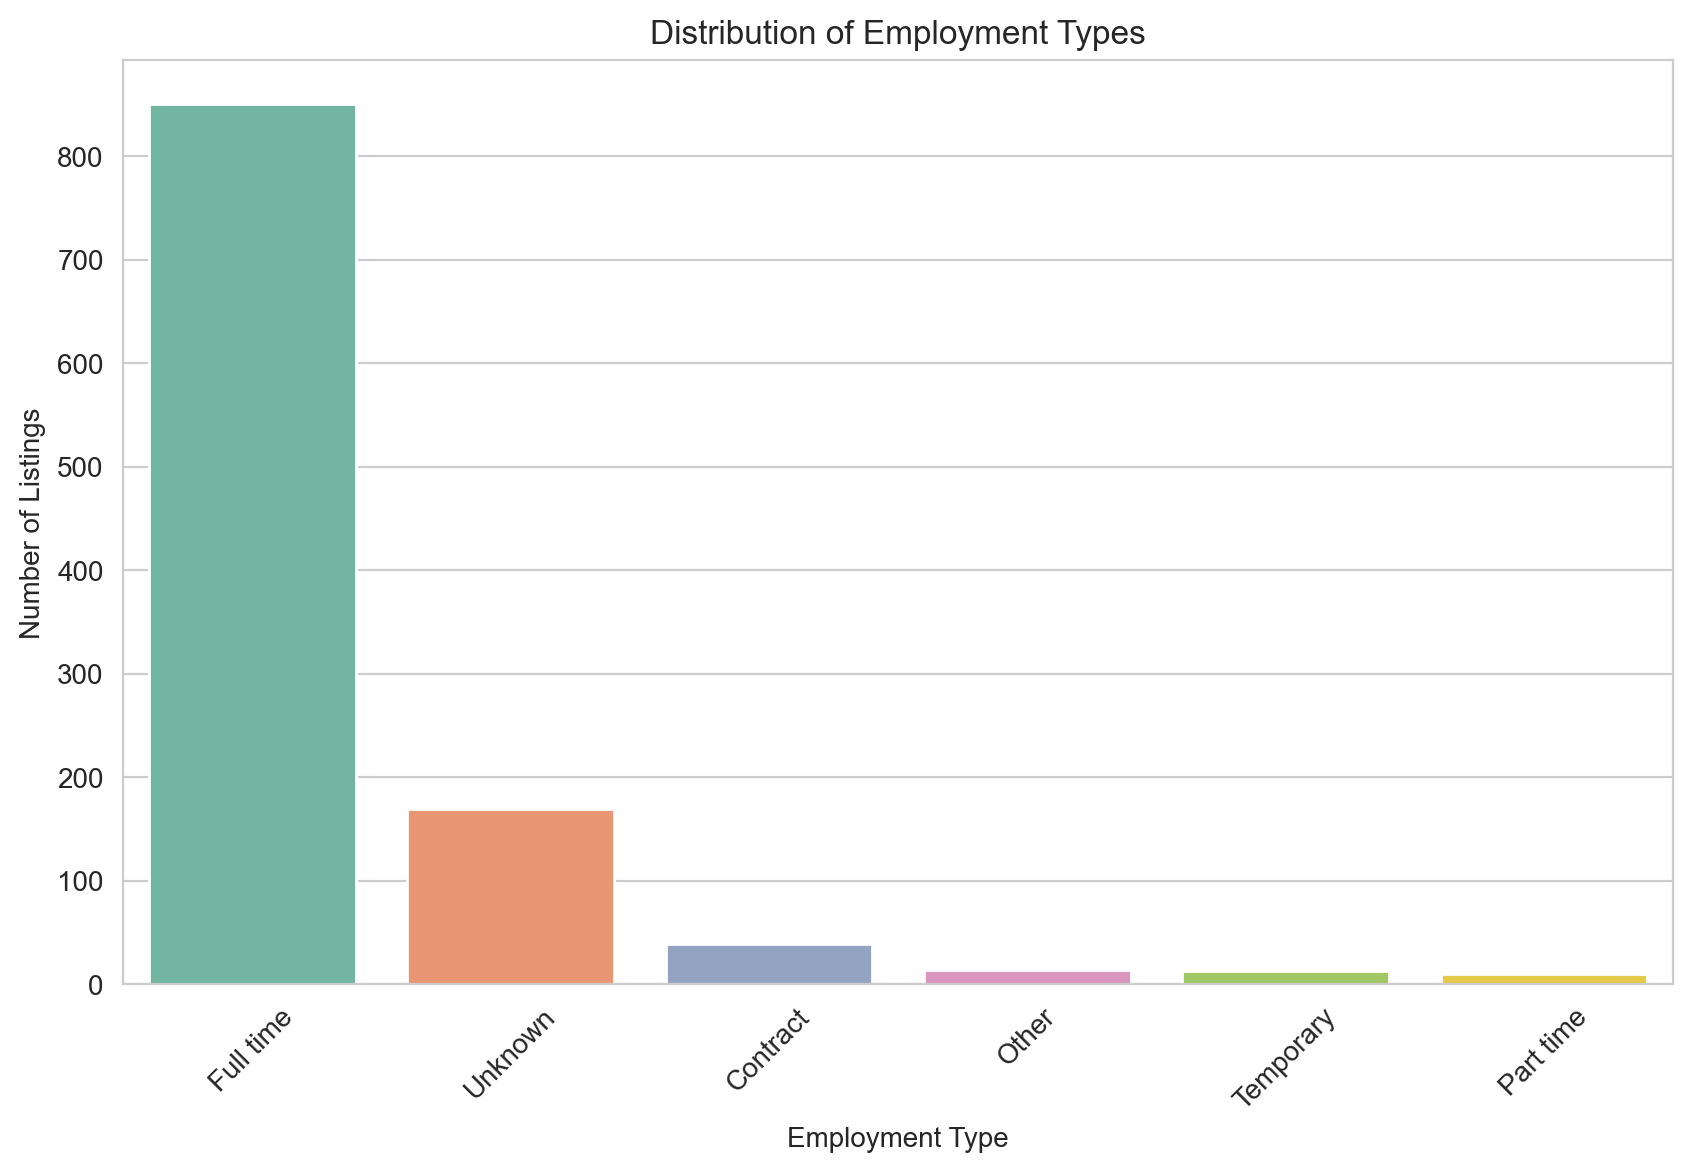

In [39]:
# Plotting the distribution of employment types
plt.figure(figsize=(10, 6), dpi=200)
type_counts = data_cleaned['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


In [40]:
import plotly.express as px

# Preparing data for the choropleth globe
# Attempting a simple approach by extracting countries from the 'Location' column
# This approach assumes the last word in the location string is the country name, which may not be accurate for all entries

data_cleaned['Country'] = data_cleaned['Location'].apply(lambda x: x.split(', ')[-1] if x != 'Unknown' else 'Unknown')
country_counts = data_cleaned[data_cleaned['Country'] != 'Unknown']['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Attempting to map country names to ISO codes
# This step is necessary because Plotly's choropleth requires ISO codes or country names that perfectly match its internal database

# Since we are not making external calls to map country names to ISO codes, this might not work perfectly for all country names
# If a country name from the dataset does not match Plotly's internal list, it will not be displayed on the globe

# Creating the choropleth globe
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Count",
                    hover_name="Country",
                    projection="natural earth",
                    title="Global Distribution of Job Listings")

fig


In [41]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=country_counts['Country'], # This should be the ISO codes ideally
    z=country_counts['Count'],
    text=country_counts['Country'],
    colorscale="Viridis",
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of Job Listings',
    locationmode='country names', # This maps your country names to the ISO codes
))

fig.update_layout(
    title_text='Global Distribution of Job Listings',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    ),
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(label="Spin",
                      method="animate",
                      args=[None, dict(frame=dict(duration=10, redraw=True), 
                                       fromcurrent=True, mode="immediate")])])]
)

fig.update_geos(projection_rotation=dict(lat=0, lon=0, roll=0))

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 30

fig.show()


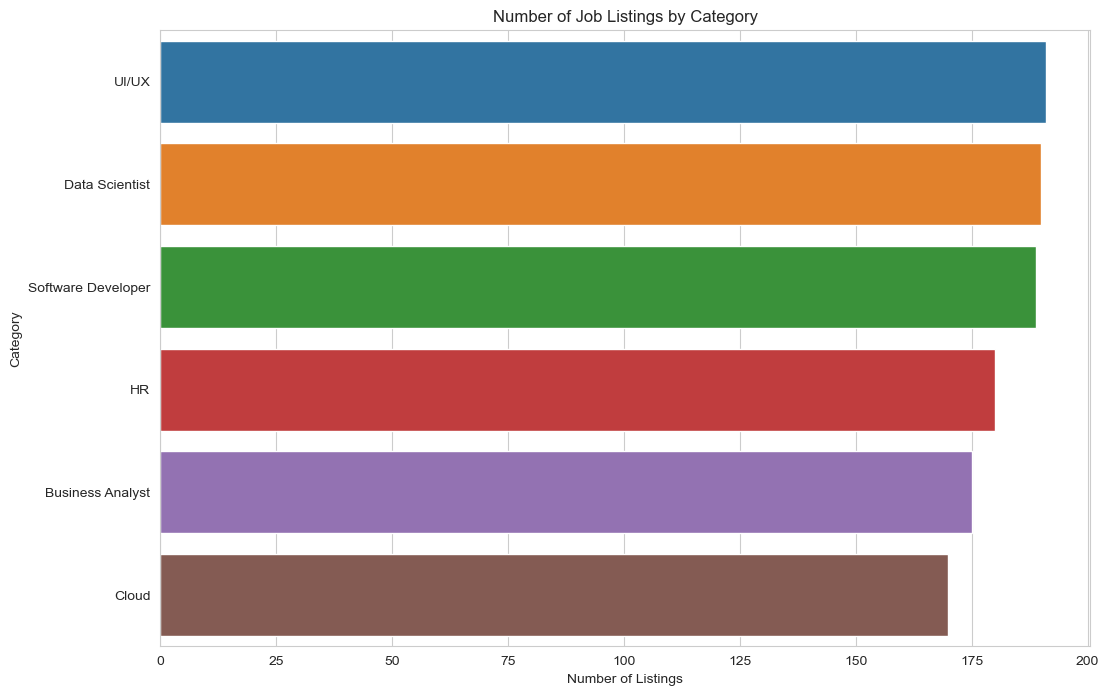

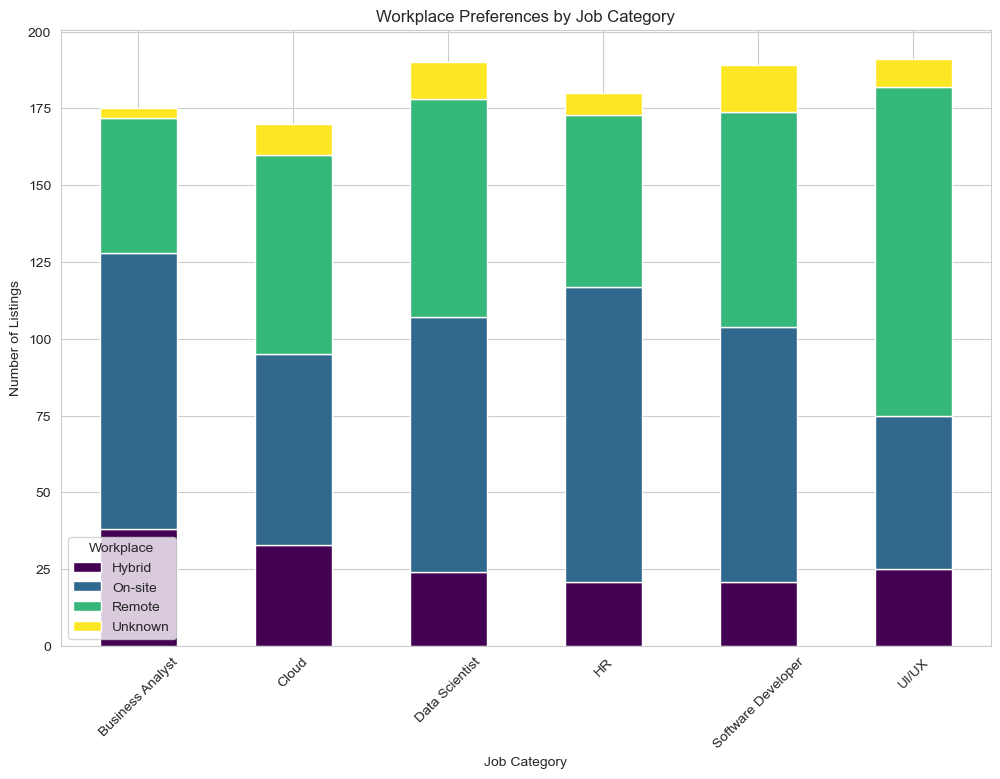

In [42]:
# Category Comparison Visualization
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=data_cleaned, order=data_cleaned['Category'].value_counts().index, palette='tab10')
plt.title('Number of Job Listings by Category')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.show()

# Workplace Preference Comparison Visualization
# We'll aggregate the data to see the distribution of workplace preferences across categories
workplace_preference = data_cleaned.groupby(['Category', 'Workplace']).size().unstack().fillna(0)
workplace_preference.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Workplace Preferences by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Workplace')
plt.show()



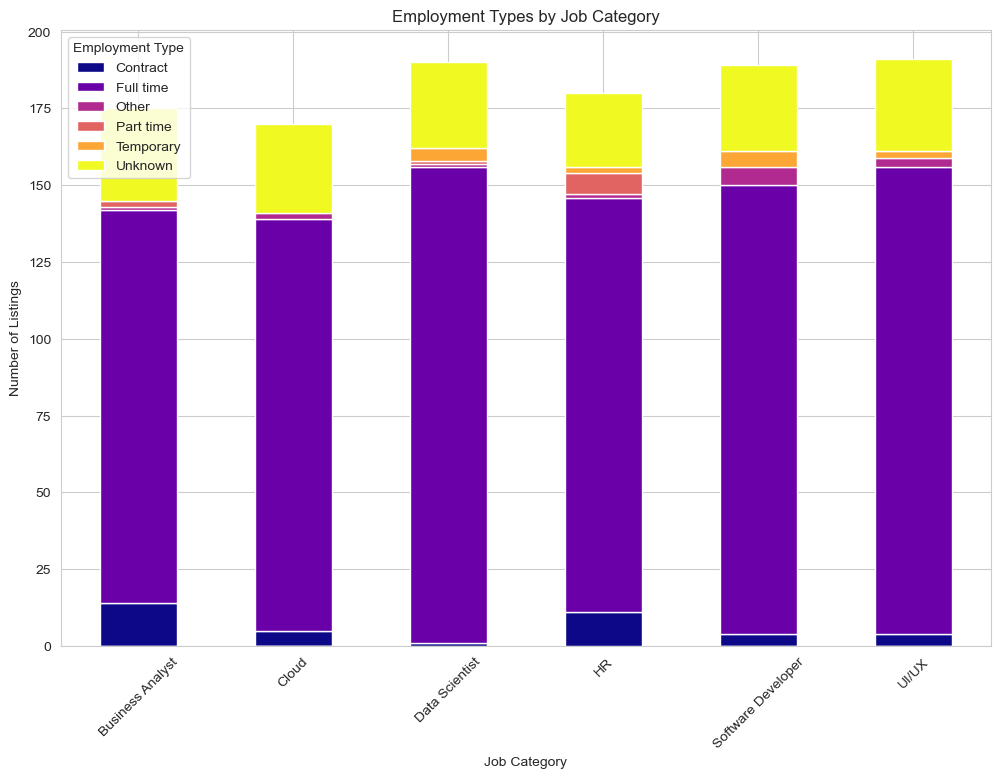

In [43]:
employment_type_comparison = data_cleaned.groupby(['Category', 'Type']).size().unstack().fillna(0)
employment_type_comparison.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Employment Types by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()

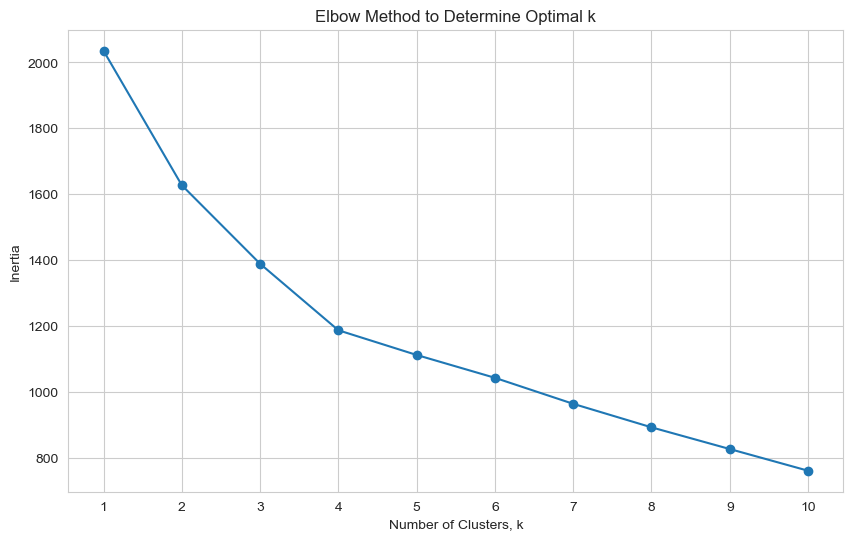

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import numpy as np

# Data Preparation: One-Hot Encoding of categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data_cleaned[['Category', 'Workplace', 'Type']])

# Determine Optimal k using the Elbow Method
inertia = []
k_values = range(1, 11)  # Testing k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [45]:
# Performing K-Means clustering with k=4
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(encoded_features)

# Adding the cluster labels to the original dataset for analysis
data_cleaned['Cluster'] = kmeans_final.labels_

# Analyzing the clusters
cluster_summary = data_cleaned.groupby('Cluster').agg({
    'Category': lambda x: x.mode()[0],  # Most common category in each cluster
    'Workplace': lambda x: x.mode()[0],  # Most common workplace in each cluster
    'Type': lambda x: x.mode()[0],       # Most common employment type in each cluster
    'Location': 'count'                  # Number of listings in each cluster
}).rename(columns={'Location': 'Count'})

cluster_summary


,Category,Workplace,Type,Count
Cluster,,,,
0,Business Analyst,Hybrid,Full time,159
1,UI/UX,Remote,Full time,367
2,Business Analyst,On-site,Unknown,171
3,HR,On-site,Full time,398


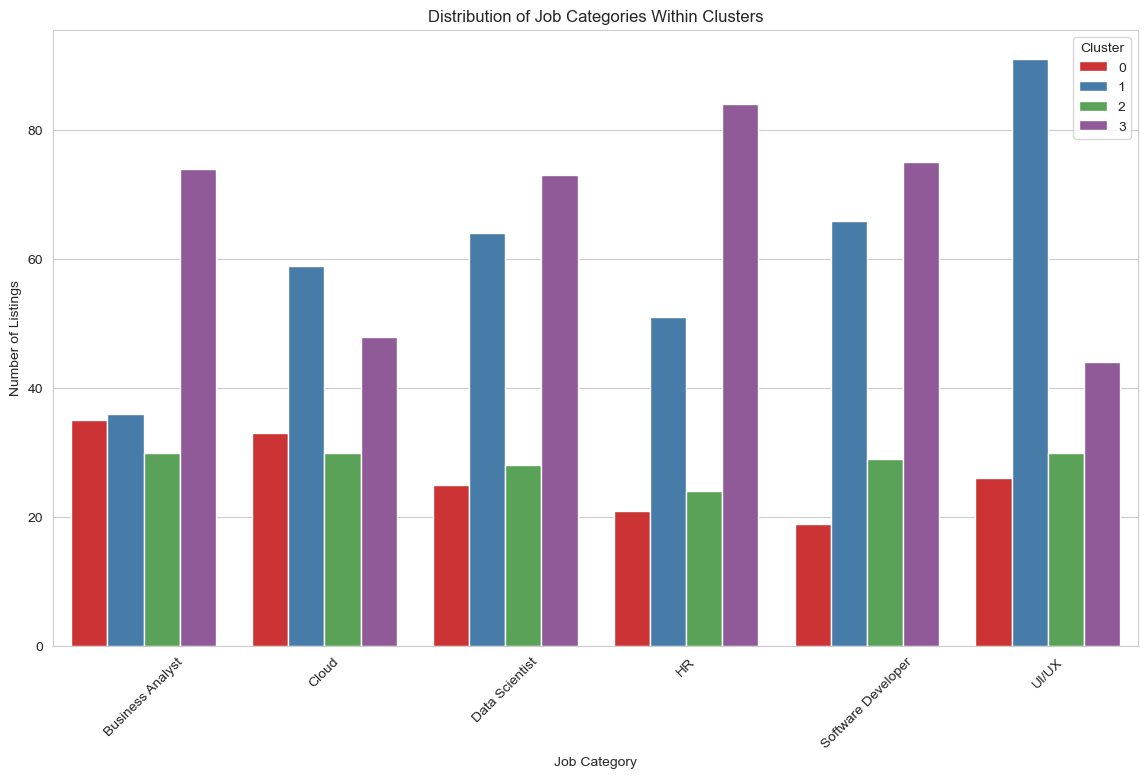

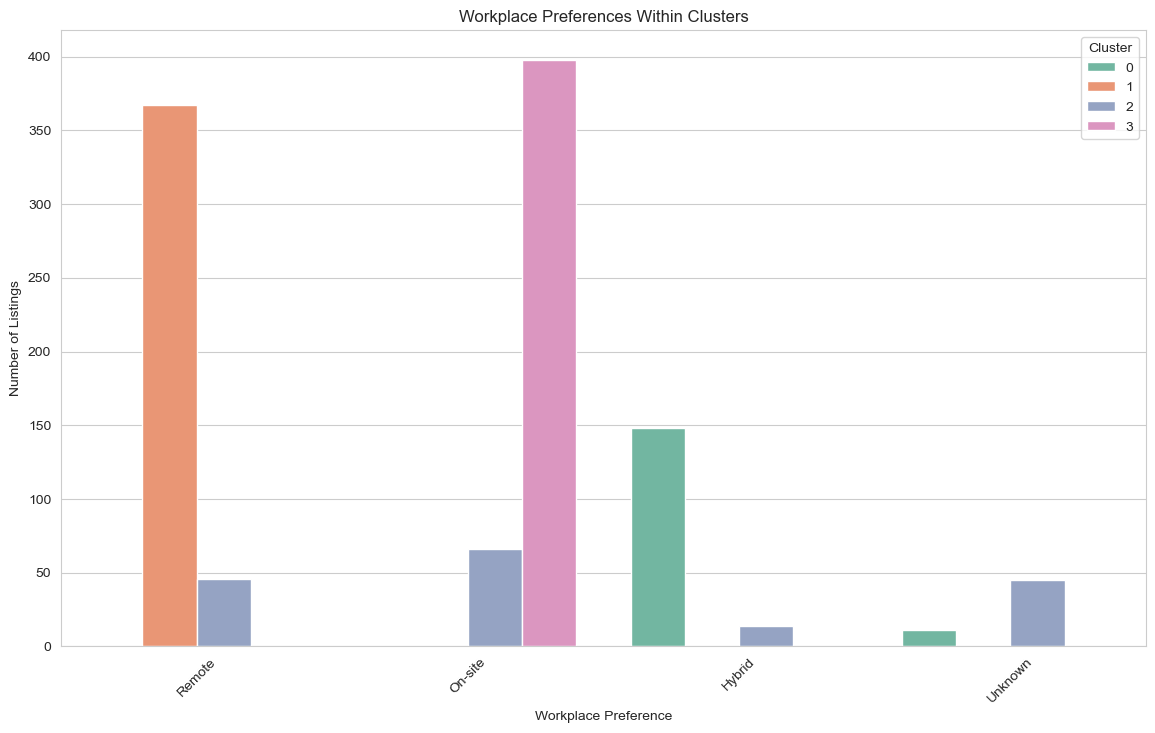

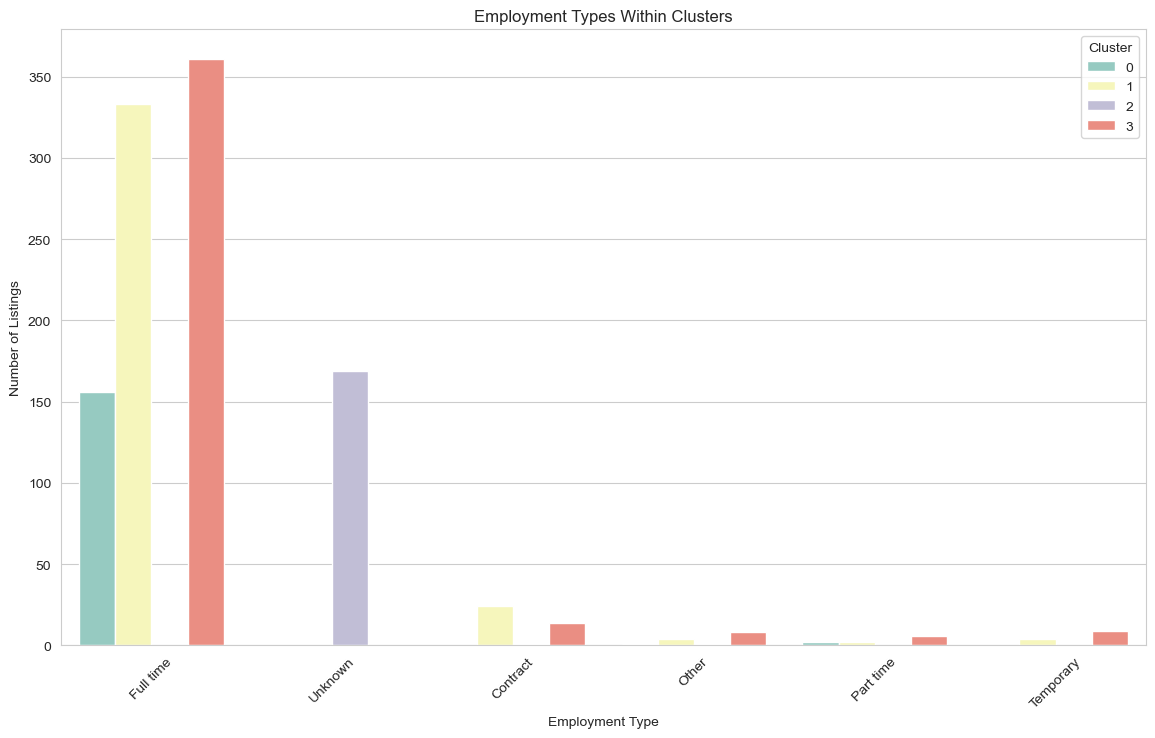

In [48]:
# Visualizing the distribution of job categories within each cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=data_cleaned, x='Category', hue='Cluster', palette='Set1')
plt.title('Distribution of Job Categories Within Clusters')
plt.xlabel('Job Category')
plt.ylabel('Number of Listings')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

# Visualizing workplace preferences within each cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=data_cleaned, x='Workplace', hue='Cluster', palette='Set2')
plt.title('Workplace Preferences Within Clusters')
plt.xlabel('Workplace Preference')
plt.ylabel('Number of Listings')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

# Visualizing employment types within each cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=data_cleaned, x='Type', hue='Cluster', palette='Set3')
plt.title('Employment Types Within Clusters')
plt.xlabel('Employment Type')
plt.ylabel('Number of Listings')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


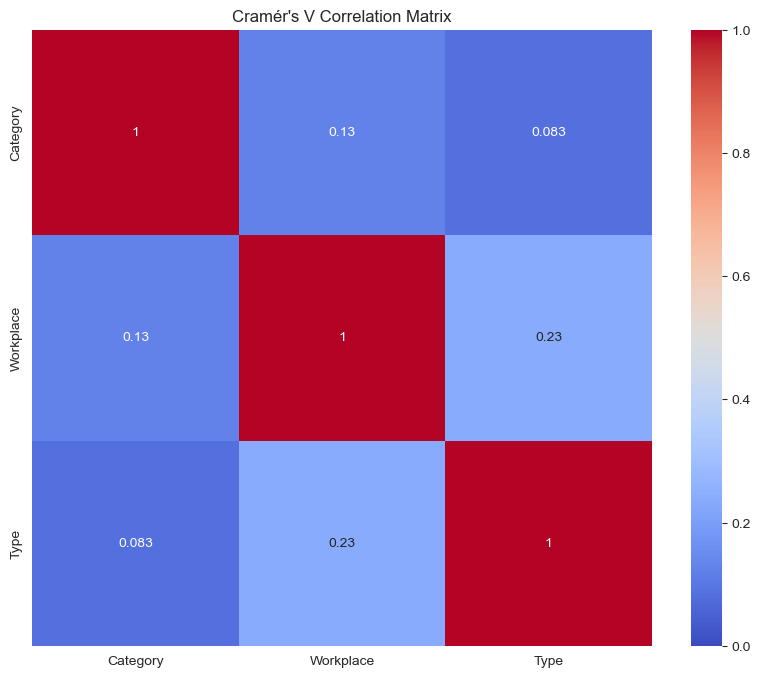

In [50]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Creating a matrix to hold the Cramér's V values
variables = ['Category', 'Workplace', 'Type']
cramers_v_matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), index=variables, columns=variables)

# Calculating Cramér's V for each pair of variables
for col1 in variables:
    for col2 in variables:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data_cleaned[col1], data_cleaned[col2])

cramers_v_matrix
# Visualizing the Cramér's V correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()
